# LEAD SCORING EDA ASSIGNMENT

## Data Cleaning & Imputation

In [1]:
# Importing neccessary modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and importing data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# To check the shape of the dataframe
df.shape

(9240, 37)

In [4]:
# To view details of all the columns present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#Checking percentage of null values
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [7]:
# To check the different no of different categories present in "What matters most to you in choosing a course" Data column
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

### Since the count of "Better Career Prospects" is high while the other two responses appear twice and once respectively. So we should drop this column.

In [8]:
# To check the different no of different categories present in "Lead Profile" Data column
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [9]:
# To check the different no of different categories present in "How did you hear about X Education" Data column
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

#### "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis so it's best to drop them.

In [10]:
# Dropping prospect id and lead number columns 
df = df.drop(['Prospect ID','Lead Number','Lead Profile','What matters most to you in choosing a course','City','Country','How did you hear about X Education'],axis = 1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Low in Relevance,No,No,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,NaN,No,No,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Might be,No,No,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Not Sure,No,No,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Might be,No,No,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Dropping columns with more than 40% null values
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis = 1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,Interested in other courses,Low in Relevance,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,Ringing,NaN,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,Will revert after reading the email,Might be,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,Ringing,Not Sure,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,Will revert after reading the email,Might be,No,No,No,No,Modified


In [12]:
# New Shape of the Dataframe
df.shape

(9240, 26)

In [13]:
# To check the different no of different categories present in "Lead Quality" Data column
df["Lead Quality"].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [14]:
# Imputed null values in Lead Quality with "Don't know"
df['Lead Quality']=df['Lead Quality'].fillna("Don't know")
df['Lead Quality'].isnull().sum()

0

In [15]:
# Rechecking the null values present in the dataframe
round(df.isnull().sum()/len(df),2)*100

Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Specialization                              16.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates About Our Courses       0.0
Tags                                        36.0
Lead Quality        

In [16]:
# To check the different no of different categories present in "Tags" Data column
df["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [17]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [18]:
# List the columns with more than 15% null values
cols = (df.isnull().sum()/df.shape[0])*100 
cols = cols[cols>= 15] 
cols

Specialization                     36.580087
What is your current occupation    29.112554
Tags                               36.287879
dtype: float64

In [19]:
# To store the cols as list
cols=cols.index.tolist()
cols

['Specialization', 'What is your current occupation', 'Tags']

In [20]:
# Replacing all the null values with unknown
for i in cols:
    df[i]=df[i].fillna('unknown')

In [21]:
# To check null value percentage
round(df.isnull().sum()/len(df),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Lead Quality                            

In [22]:
# Dropping the remaining null value rows
df=df.dropna()

In [23]:
# To check if any null values are present
round(df.isnull().sum()/len(df),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Lead Quality                            

In [24]:
# To check the Shape of the Dataframe 
df.shape

(9074, 26)

## Univariate Analysis

In [25]:
# To v
df.Converted.value_counts(normalize = True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

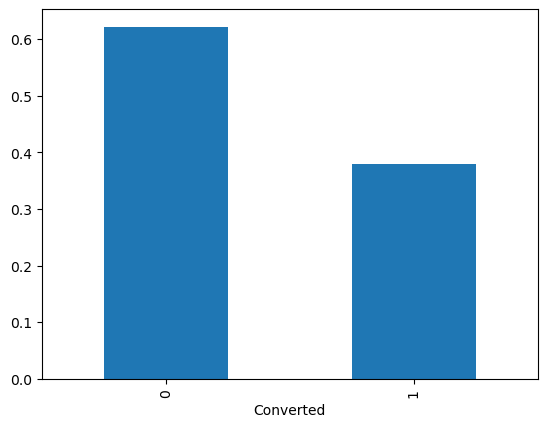

In [26]:
df["Converted"].value_counts(normalize=True).plot.bar()
plt.show()

**-Lead conversion rate is around 38%**

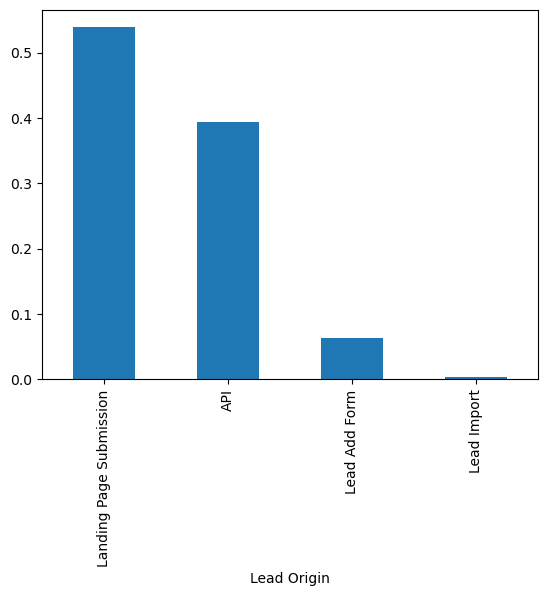

In [27]:
df["Lead Origin"].value_counts(normalize=True).plot.bar()
plt.show()

In [28]:
df["Lead Origin"].value_counts(normalize = True)*100

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: proportion, dtype: float64

In [29]:
df["Lead Source"].value_counts(normalize = True)*100

Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: proportion, dtype: float64

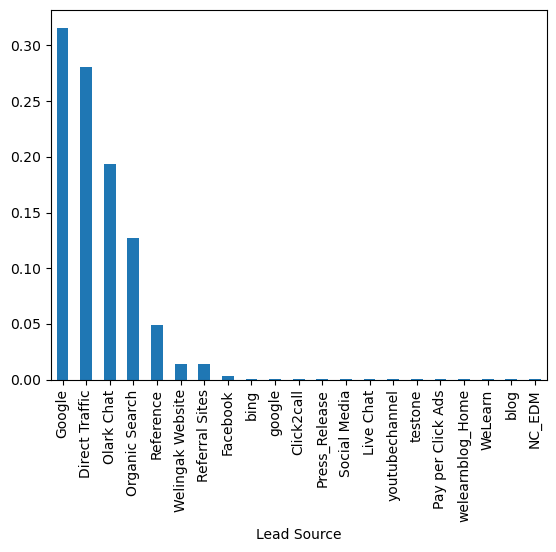

In [30]:
df["Lead Source"].value_counts(normalize=True).plot.bar()
plt.show()

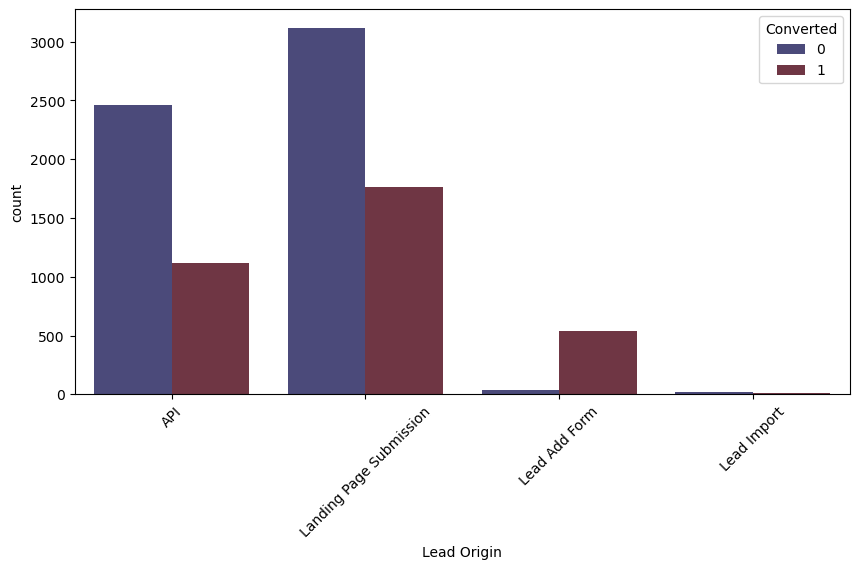

In [31]:
#Countplot between Lead Origin and Converted
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='icefire')
plt.xticks(rotation = 45)
plt.show()

In [32]:
# Finding the percentage conversion for each Origin
df.groupby('Lead Origin')['Converted'].mean()*100

Lead Origin
API                        31.162661
Landing Page Submission    36.171955
Lead Add Form              93.631670
Lead Import                30.000000
Name: Converted, dtype: float64

**Inference-
API and Landing Page Submission have a conversion rate of 30-35%, but the number of leads originated from them is considerable.
Lead Add Form has a conversion rate of more than 90%, but the number of leads is pretty low.
Lead Import has a very low count as well as a low conversion rate, thus can be ignored.
To improve the overall lead conversion rate, we need to focus more on improving the lead conversion of "API" and "Landing Page Submission" origin and generate more leads from "Lead Add Form".**

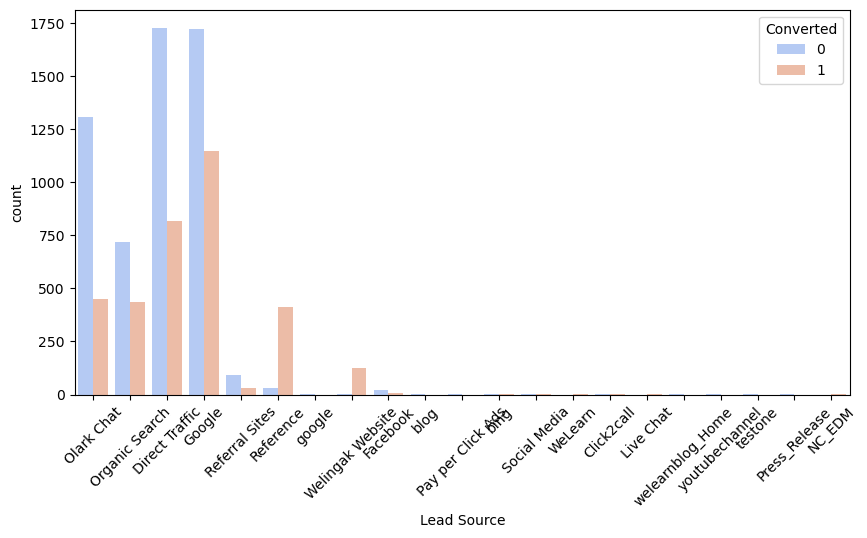

In [33]:
# Countplot between Lead Source and Converted
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='coolwarm')
plt.xticks(rotation = 45)
plt.show()

In [34]:
# Finding the percentage conversion for each source
df.groupby('Lead Source')['Converted'].mean()*100

Lead Source
Click2call            75.000000
Direct Traffic        32.166732
Facebook              29.032258
Google                39.993026
Live Chat            100.000000
NC_EDM               100.000000
Olark Chat            25.556189
Organic Search        37.781629
Pay per Click Ads      0.000000
Press_Release          0.000000
Reference             92.550790
Referral Sites        24.800000
Social Media          50.000000
WeLearn              100.000000
Welingak Website      98.449612
bing                  16.666667
blog                   0.000000
google                 0.000000
testone                0.000000
welearnblog_Home       0.000000
youtubechannel         0.000000
Name: Converted, dtype: float64

In [35]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads','Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [36]:
# Replacing google with " Google"
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

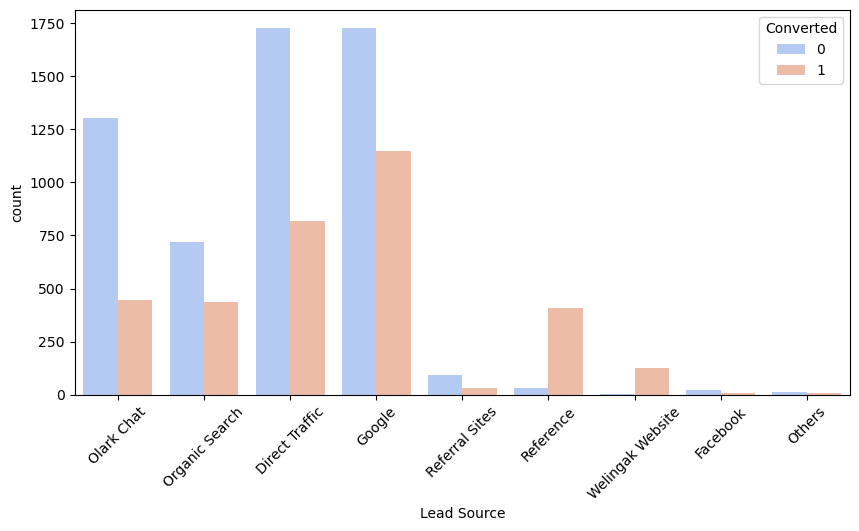

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='coolwarm')
plt.xticks(rotation = 45)
plt.show()

In [38]:
df["Lead Source"].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: count, dtype: int64

In [39]:
df.groupby('Lead Source')['Converted'].mean()*100

Lead Source
Direct Traffic      32.166732
Facebook            29.032258
Google              39.923425
Olark Chat          25.556189
Organic Search      37.781629
Others              39.130435
Reference           92.550790
Referral Sites      24.800000
Welingak Website    98.449612
Name: Converted, dtype: float64

**Inference-
The top three lead sources are Google, Direct Traffic, and Olark Chat.
Reference, Organic Search, Welingwak Website, and Referral Sites are also significant lead sources.
The lead conversion rate is highest for Reference, Welingak Website, and Direct Traffic.
Facebook, Olark Chat, Referral Sites and others have a low lead count and conversion rate. We need to re-evaluate our lead generation strategies for these sources and consider either optimizing them or discontinuing them altogether.
To improve the overall lead conversion rate, we need to focus on optimizing our lead generation and conversion strategies for high-performing lead sources and re-evaluating our strategies for low-performing lead sources.**


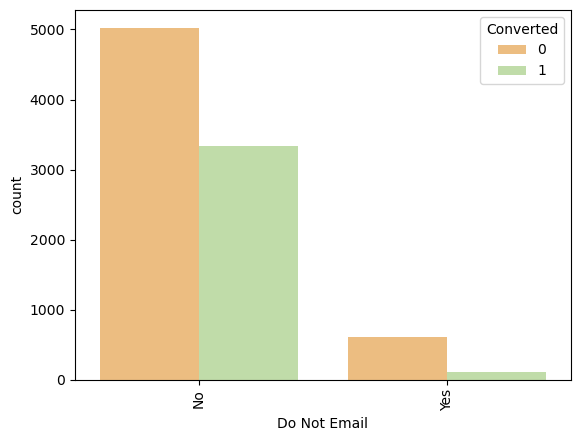

In [40]:
# Countplot between Do Not Email and Converted
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Spectral')
plt.xticks(rotation = 90)
plt.show()

In [41]:
df.groupby('Do Not Email')['Converted'].mean()*100

Do Not Email
No     39.854032
Yes    14.525140
Name: Converted, dtype: float64

In [42]:
df["Do Not Email"].value_counts()

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

**Inference-
Most of the Leads do not want Email.
The conversion rate for people want an email is significantly lower than those who do want an Email**

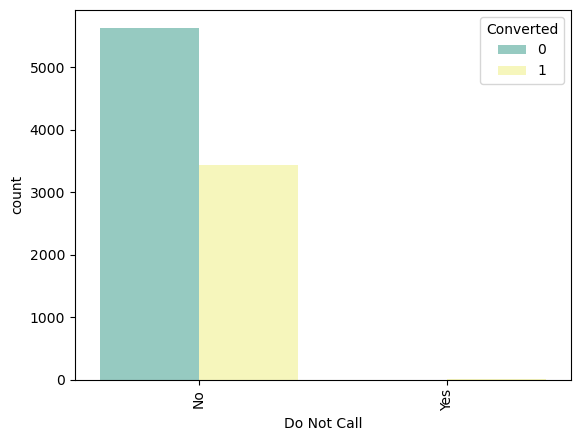

In [43]:
# Countplot between Do Not Call and Converted
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

In [44]:
df.groupby('Do Not Call')['Converted'].mean()*100

Do Not Call
No      37.841711
Yes    100.000000
Name: Converted, dtype: float64

In [45]:
df["Do Not Call"].value_counts()

Do Not Call
No     9072
Yes       2
Name: count, dtype: int64

In [46]:
df=df.drop(["Do Not Call"], axis=1)

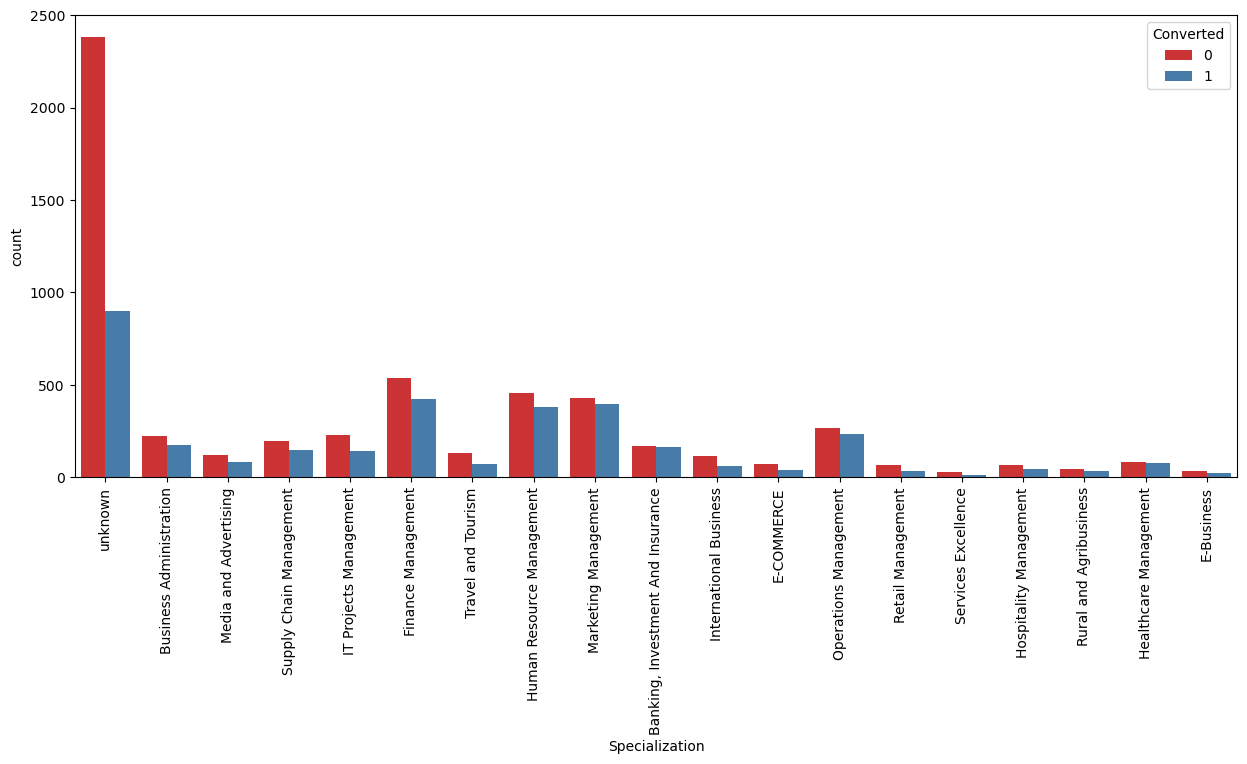

In [47]:
# Countplot between Specialization and Converted
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [48]:
df.groupby('Specialization')['Converted'].mean()*100

Specialization
Banking, Investment And Insurance    48.955224
Business Administration              43.859649
E-Business                           36.842105
E-COMMERCE                           35.135135
Finance Management                   44.004171
Healthcare Management                48.717949
Hospitality Management               40.540541
Human Resource Management            45.400239
IT Projects Management               38.251366
International Business               35.227273
Marketing Management                 48.238153
Media and Advertising                41.584158
Operations Management                46.893788
Retail Management                    34.000000
Rural and Agribusiness               42.465753
Services Excellence                  27.500000
Supply Chain Management              42.774566
Travel and Tourism                   35.148515
unknown                              27.452773
Name: Converted, dtype: float64

In [49]:
df["Specialization"].value_counts()

Specialization
unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

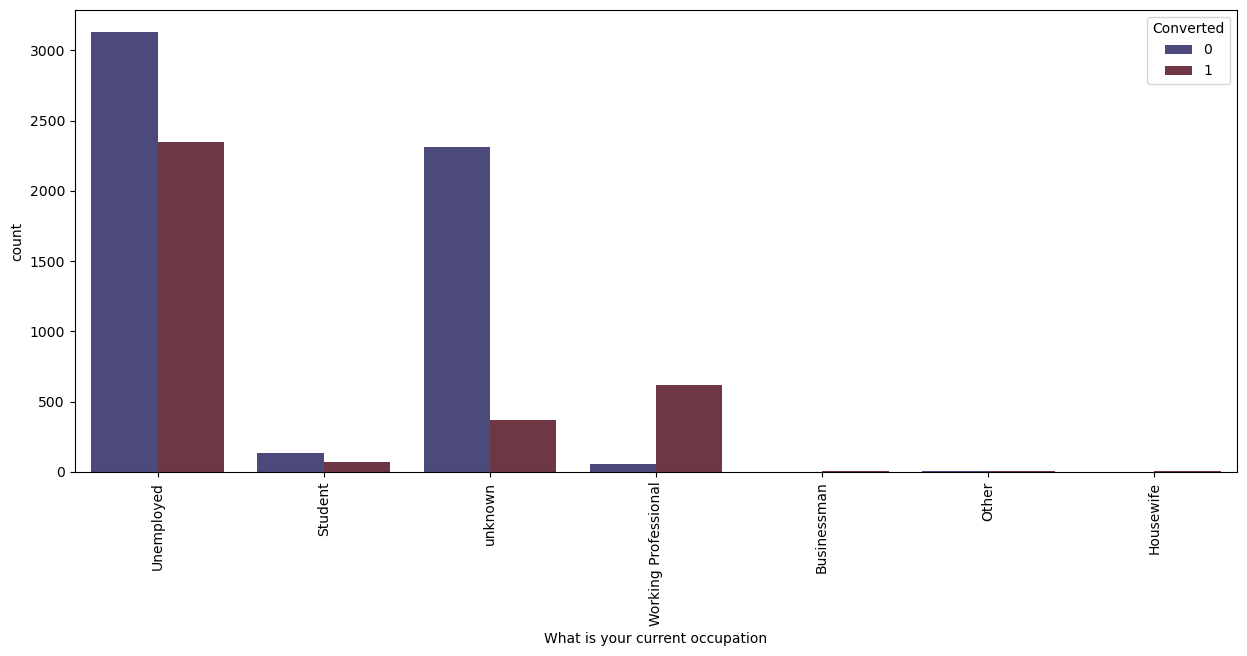

In [50]:
# Countplot between What is your current occupation and Converted
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='icefire')
plt.xticks(rotation = 90)
plt.show()

In [51]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['unknown'], 'Unemployed')

In [52]:
df.groupby('What is your current occupation')['Converted'].mean()*100

What is your current occupation
Businessman              62.500000
Housewife               100.000000
Other                    60.000000
Student                  35.922330
Unemployed               33.288393
Working Professional     91.875923
Name: Converted, dtype: float64

In [53]:
df["What is your current occupation"].value_counts(normalize=True)*100

What is your current occupation
Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: proportion, dtype: float64

**Inference-
Most responses are from the Unemployed Category, however their conversion rate is around 33%
Working Professional, Businessman and Housewives have low count but high conversion rates**

## Dummy variable creation

In [54]:
objectcols=df.loc[:,df.dtypes=='object']
objectcols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
object_cols=list(objectcols)
print(object_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [56]:
dummy=pd.get_dummies(df[object_cols], dtype=int, drop_first=True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
df1=pd.concat([df,dummy],axis=1)
df1.shape

(9074, 129)

In [58]:
df1=df1.drop(object_cols, axis=1)

In [59]:
df1.shape

(9074, 108)

## Data Modeling

In [60]:
# Import required modules for modeling

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Dropping the target column
dfx=df1.drop("Converted", axis=1)
dfx.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
dfy = df1["Converted"]

In [63]:
# Train - Test split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
# lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)


X_train Size (6351, 107)
y_train Size (6351,)


In [65]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [66]:
df1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151,0.538351,0.064029,0.003306,0.003416,0.316619,0.193189,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.485053,4.858802,545.256560,2.160871,0.498554,0.244818,0.057407,0.058353,0.465183,0.394822,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,922.750000,3.200000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Correlation table
df1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.010651,0.029022,-0.124085,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,-0.036983,0.107321,-0.312573,...,-0.003146,0.022317,-0.107875,-0.037993,0.227450,-0.007468,-0.001620,0.005513,0.003061,0.009819
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,-0.050248,0.215448,-0.378626,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,-0.053735,0.205777,-0.503658,...,-0.001798,0.013928,-0.096466,-0.088593,0.026102,-0.011516,0.059445,0.019415,0.021668,0.001457
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,-0.059438,0.079515,-0.528424,...,0.009722,0.002608,-0.084643,-0.118758,0.043041,-0.011337,0.052736,-0.000847,0.018171,-0.011337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013451,-0.007468,-0.009298,-0.011516,-0.011337,-0.002746,-0.000605,-0.000615,-0.007146,0.021455,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,0.360233,-0.001620,0.137169,0.059445,0.052736,0.115585,-0.027600,-0.023765,-0.002431,-0.098929,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,0.037893,0.005513,0.009594,0.019415,-0.000847,0.007222,-0.003426,-0.003483,0.011463,-0.010275,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,-0.016286,0.003061,0.003951,0.021668,0.018171,-0.018465,-0.004066,-0.004133,-0.000836,-0.010703,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


In [68]:
# RFE to find the top 20 features
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Facebook', False, 84),
 ('Lead Source_Google', False, 64),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 74),
 ('Lead Source_Others', False, 31),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', False, 2),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', False, 48),
 ('Last Activity_Email Link Clicked', False, 79),
 ('Last Activity_Email Marked Spam', False, 72),
 ('Last Activity_Email Opened', False, 59),
 ('Last Activity_Email Received', False, 83),
 ('Last Activity_Form Submitted on Website', False, 47),
 ('Last Activity_Had a Phone Conversation', False, 35),
 ('Last A

In [70]:
# Columns selected by the RFE algorithm
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off', 'Tags_unknown',
       'Tags_wrong number given', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [71]:
print("Number of columns:", len(rfe_cols))

Number of columns: 20


In [72]:
X_train_rfe=X_train[rfe_cols]
X_train_rfe.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_unknown,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3009,0.178347,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,0.085355,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9226,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4750,0.619946,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7987,0.711590,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Model 1

In [73]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.5
Date:                Tue, 30 Jul 2024   Deviance:                       2309.0
Time:                        19:52:10   Pearson chi2:                 9.15e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6207
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2338      0.230    -14.069      0.000      -3.684      -2.783
Total Time Spent on Website                       4.1841      0.236     17.709      0.000       3.721       4.647
Lead Origin_Landing Page Submission              -1.2257      0.124     -9.890      0.000      -1.469      -0.983
Lead Origin_Lead Add Form                         0.6671      0.459      1.453      0.146      -0.233       1.567
Lead Source_Welingak Website                      4.0024      0.860      4.654      0.000       2.317       5.688
Last Activity_SMS Sent                            1.3265      0.236      5.627      0.000       0.864       1.789
Tags_Busy                                         2.0590      0.317      6.492      0.000       1.437       2.681
Tags_Closed by Horizzon                           7.8693      0.772     10.187      0.000       6.355       9.383
Tags_Lost to EINS                                 8.0135      0.784     10.225      0.000       6.477       9.550
Tags_Ringing                                     -2.2689      0.328     -6.917      0.000      -2.912      -1.626
Tags_Will revert after reading the email          6.2994      0.282     22.370      0.000       5.748       6.851
Tags_invalid number                             -22.9624   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
Tags_number not provided                        -23.7239   4.17e+04     -0.001      1.000   -8.17e+04    8.16e+04
Tags_switched off                                -2.2397      0.580     -3.859      0.000      -3.377      -1.102
Tags_unknown                                      1.5031      0.217      6.938      0.000       1.078       1.928
Tags_wrong number given                         -23.6487   3.26e+04     -0.001      0.999   -6.38e+04    6.38e+04
Lead Quality_High in Relevance                    1.1459      0.504      2.274      0.023       0.158       2.133
Lead Quality_Worst                               -2.0295      0.726     -2.794      0.005      -3.453      -0.606
Last Notable Activity_Modified                   -1.4955      0.157     -9.545      0.000      -1.803      -1.188
Last Notable Activity_Olark Chat Conversation    -1.4996      0.425     -3.532      0.000      -2.332      -0.667
Last Notable Activity_SMS Sent                    1.0471      0.273      3.838      0.000       0.512       1.582
=================================================================================================================
"""

In [74]:
X_train_rfe = X_train_rfe.drop('Tags_invalid number',axis=1)

**P Value of "Tags_invalid number" is high and the column has been dropped because of it**

### Model 2

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.8
Date:                Tue, 30 Jul 2024   Deviance:                       2317.6
Time:                        19:52:10   Pearson chi2:                 9.24e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6202
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3841      0.228    -14.850      0.000      -3.831      -2.937
Total Time Spent on Website                       4.2157      0.236     17.854      0.000       3.753       4.679
Lead Origin_Landing Page Submission              -1.2415      0.124    -10.030      0.000      -1.484      -0.999
Lead Origin_Lead Add Form                         0.6925      0.462      1.500      0.134      -0.213       1.598
Lead Source_Welingak Website                      3.9740      0.861      4.614      0.000       2.286       5.662
Last Activity_SMS Sent                            1.3197      0.236      5.587      0.000       0.857       1.783
Tags_Busy                                         2.2275      0.313      7.109      0.000       1.613       2.842
Tags_Closed by Horizzon                           7.9877      0.772     10.345      0.000       6.474       9.501
Tags_Lost to EINS                                 8.1506      0.782     10.417      0.000       6.617       9.684
Tags_Ringing                                     -2.0991      0.324     -6.479      0.000      -2.734      -1.464
Tags_Will revert after reading the email          6.4471      0.280     22.995      0.000       5.898       6.997
Tags_number not provided                        -22.5531   2.53e+04     -0.001      0.999   -4.96e+04    4.96e+04
Tags_switched off                                -2.0645      0.578     -3.572      0.000      -3.197      -0.932
Tags_unknown                                      1.6576      0.214      7.755      0.000       1.239       2.076
Tags_wrong number given                         -22.4839   1.98e+04     -0.001      0.999   -3.88e+04    3.87e+04
Lead Quality_High in Relevance                    1.2100      0.513      2.360      0.018       0.205       2.215
Lead Quality_Worst                               -1.9944      0.729     -2.736      0.006      -3.423      -0.566
Last Notable Activity_Modified                   -1.4853      0.157     -9.475      0.000      -1.793      -1.178
Last Notable Activity_Olark Chat Conversation    -1.5121      0.425     -3.557      0.000      -2.345      -0.679
Last Notable Activity_SMS Sent                    1.0238      0.273      3.754      0.000       0.489       1.558
=================================================================================================================
"""

In [76]:
# To Drop the column "Tags_number not provided"
X_train_rfe = X_train_rfe.drop('Tags_number not provided',axis=1)

**P Value of "Tags_number not provided" is high and the column has been dropped because of it**

### Model 3

In [77]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1161.0
Date:                Tue, 30 Jul 2024   Deviance:                       2322.1
Time:                        19:52:10   Pearson chi2:                 9.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6199
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4418      0.228    -15.064      0.000      -3.890      -2.994
Total Time Spent on Website                       4.2087      0.236     17.845      0.000       3.746       4.671
Lead Origin_Landing Page Submission              -1.2493      0.124    -10.094      0.000      -1.492      -1.007
Lead Origin_Lead Add Form                         0.6969      0.463      1.506      0.132      -0.210       1.604
Lead Source_Welingak Website                      3.9630      0.862      4.599      0.000       2.274       5.652
Last Activity_SMS Sent                            1.3196      0.236      5.584      0.000       0.856       1.783
Tags_Busy                                         2.3002      0.313      7.359      0.000       1.688       2.913
Tags_Closed by Horizzon                           8.0380      0.772     10.410      0.000       6.525       9.551
Tags_Lost to EINS                                 8.2052      0.782     10.498      0.000       6.673       9.737
Tags_Ringing                                     -2.0231      0.323     -6.263      0.000      -2.656      -1.390
Tags_Will revert after reading the email          6.5095      0.281     23.197      0.000       5.960       7.059
Tags_switched off                                -1.9874      0.577     -3.442      0.001      -3.119      -0.856
Tags_unknown                                      1.7228      0.214      8.060      0.000       1.304       2.142
Tags_wrong number given                         -21.4096    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
Lead Quality_High in Relevance                    1.2378      0.517      2.396      0.017       0.225       2.250
Lead Quality_Worst                               -1.9626      0.731     -2.684      0.007      -3.396      -0.529
Last Notable Activity_Modified                   -1.4822      0.157     -9.457      0.000      -1.789      -1.175
Last Notable Activity_Olark Chat Conversation    -1.5159      0.425     -3.567      0.000      -2.349      -0.683
Last Notable Activity_SMS Sent                    1.0098      0.273      3.705      0.000       0.476       1.544
=================================================================================================================
"""

In [78]:
X_train_rfe = X_train_rfe.drop('Tags_wrong number given',axis=1)

**P Value of "Tags_wrong number given" is high and the column has been dropped because of it**

### Model 4

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.8
Date:                Tue, 30 Jul 2024   Deviance:                       2329.5
Time:                        19:52:10   Pearson chi2:                 9.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6195
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5532      0.229    -15.507      0.000      -4.002      -3.104
Total Time Spent on Website                       4.1958      0.235     17.823      0.000       3.734       4.657
Lead Origin_Landing Page Submission              -1.2551      0.124    -10.154      0.000      -1.497      -1.013
Lead Origin_Lead Add Form                         0.7101      0.465      1.528      0.127      -0.201       1.621
Lead Source_Welingak Website                      3.9423      0.863      4.570      0.000       2.252       5.633
Last Activity_SMS Sent                            1.3160      0.236      5.566      0.000       0.853       1.779
Tags_Busy                                         2.4283      0.311      7.806      0.000       1.819       3.038
Tags_Closed by Horizzon                           8.1321      0.772     10.534      0.000       6.619       9.645
Tags_Lost to EINS                                 8.2984      0.780     10.645      0.000       6.771       9.826
Tags_Ringing                                     -1.8895      0.321     -5.888      0.000      -2.518      -1.261
Tags_Will revert after reading the email          6.6220      0.281     23.571      0.000       6.071       7.173
Tags_switched off                                -1.8520      0.576     -3.215      0.001      -2.981      -0.723
Tags_unknown                                      1.8422      0.213      8.634      0.000       1.424       2.260
Lead Quality_High in Relevance                    1.2730      0.519      2.452      0.014       0.255       2.291
Lead Quality_Worst                               -1.8887      0.738     -2.561      0.010      -3.334      -0.443
Last Notable Activity_Modified                   -1.4733      0.157     -9.405      0.000      -1.780      -1.166
Last Notable Activity_Olark Chat Conversation    -1.5173      0.425     -3.573      0.000      -2.350      -0.685
Last Notable Activity_SMS Sent                    0.9951      0.272      3.654      0.000       0.461       1.529
=================================================================================================================
"""

In [80]:
X_train_rfe = X_train_rfe.drop('Lead Origin_Lead Add Form',axis=1)

**P Value of "Lead Origin_Lead Add Form" is high and the column has been dropped because of it**

### Model 5

In [81]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1166.0
Date:                Tue, 30 Jul 2024   Deviance:                       2331.9
Time:                        19:52:11   Pearson chi2:                 8.69e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6193
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5176      0.228    -15.442      0.000      -3.964      -3.071
Total Time Spent on Website                       4.1707      0.235     17.732      0.000       3.710       4.632
Lead Origin_Landing Page Submission              -1.2842      0.122    -10.496      0.000      -1.524      -1.044
Lead Source_Welingak Website                      4.6306      0.735      6.298      0.000       3.189       6.072
Last Activity_SMS Sent                            1.3451      0.235      5.725      0.000       0.885       1.806
Tags_Busy                                         2.4173      0.311      7.769      0.000       1.807       3.027
Tags_Closed by Horizzon                           8.3409      0.763     10.939      0.000       6.846       9.835
Tags_Lost to EINS                                 8.3275      0.778     10.699      0.000       6.802       9.853
Tags_Ringing                                     -1.8737      0.321     -5.838      0.000      -2.503      -1.245
Tags_Will revert after reading the email          6.6724      0.279     23.889      0.000       6.125       7.220
Tags_switched off                                -1.8727      0.576     -3.250      0.001      -3.002      -0.743
Tags_unknown                                      1.8271      0.213      8.570      0.000       1.409       2.245
Lead Quality_High in Relevance                    1.3279      0.521      2.549      0.011       0.307       2.349
Lead Quality_Worst                               -1.8895      0.732     -2.582      0.010      -3.324      -0.455
Last Notable Activity_Modified                   -1.4906      0.157     -9.516      0.000      -1.798      -1.184
Last Notable Activity_Olark Chat Conversation    -1.5313      0.425     -3.607      0.000      -2.363      -0.699
Last Notable Activity_SMS Sent                    0.9763      0.271      3.597      0.000       0.444       1.508
=================================================================================================================
"""

In [82]:
# calculate VIF(Variance Inflation Factor) to compare and make a decision

vif = pd.DataFrame()
X = X_train_rfe
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
15,Last Notable Activity_SMS Sent,6.20
3,Last Activity_SMS Sent,5.96
1,Lead Origin_Landing Page Submission,2.31
0,Total Time Spent on Website,2.13
8,Tags_Will revert after reading the email,2.07
13,Last Notable Activity_Modified,1.85
10,Tags_unknown,1.79
11,Lead Quality_High in Relevance,1.42
7,Tags_Ringing,1.37
5,Tags_Closed by Horizzon,1.35


In [83]:
X_train_rfe = X_train_rfe.drop('Last Notable Activity_SMS Sent',axis=1)

**High VIF value for "Last Notable Activity_SMS Sent" droping this column from the model**

### Final Model 6

In [84]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1172.6
Date:                Tue, 30 Jul 2024   Deviance:                       2345.1
Time:                        19:52:11   Pearson chi2:                 8.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6186
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3838      0.223    -15.195      0.000      -3.820      -2.947
Total Time Spent on Website                       4.1279      0.234     17.666      0.000       3.670       4.586
Lead Origin_Landing Page Submission              -1.2886      0.121    -10.636      0.000      -1.526      -1.051
Lead Source_Welingak Website                      4.5677      0.738      6.191      0.000       3.122       6.014
Last Activity_SMS Sent                            2.0693      0.121     17.137      0.000       1.833       2.306
Tags_Busy                                         2.4152      0.308      7.853      0.000       1.812       3.018
Tags_Closed by Horizzon                           8.4976      0.765     11.106      0.000       6.998       9.997
Tags_Lost to EINS                                 8.4475      0.787     10.731      0.000       6.905       9.990
Tags_Ringing                                     -1.7886      0.318     -5.628      0.000      -2.412      -1.166
Tags_Will revert after reading the email          6.7131      0.282     23.825      0.000       6.161       7.265
Tags_switched off                                -1.7686      0.573     -3.085      0.002      -2.892      -0.645
Tags_unknown                                      1.7823      0.212      8.414      0.000       1.367       2.197
Lead Quality_High in Relevance                    1.2740      0.523      2.438      0.015       0.250       2.298
Lead Quality_Worst                               -1.9325      0.729     -2.652      0.008      -3.361      -0.504
Last Notable Activity_Modified                   -1.8371      0.131    -14.000      0.000      -2.094      -1.580
Last Notable Activity_Olark Chat Conversation    -1.6112      0.424     -3.801      0.000      -2.442      -0.780
=================================================================================================================
"""

In [85]:
# calculate VIF(Variance Inflation Factor) to compare and make a decision

vif = pd.DataFrame()
X = X_train_rfe
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
1,Lead Origin_Landing Page Submission,2.31
0,Total Time Spent on Website,2.12
8,Tags_Will revert after reading the email,2.00
10,Tags_unknown,1.76
3,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.51
11,Lead Quality_High in Relevance,1.42
5,Tags_Closed by Horizzon,1.35
7,Tags_Ringing,1.34
12,Lead Quality_Worst,1.17


In [86]:
rfe_columns = X_train_rfe.columns
rfe_columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Lead Quality_High in Relevance', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [87]:
print("Number of columns:", len(rfe_columns))

Number of columns: 15


In [88]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.103969
1012    0.073254
9226    0.007102
4750    0.850466
7987    0.999037
1281    0.997361
2880    0.053017
4971    0.980604
7536    0.999073
1248    0.030686
dtype: float64

In [89]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10396884, 0.07325395, 0.00710188, 0.85046638, 0.9990372 ,
       0.99736113, 0.05301702, 0.98060398, 0.99907316, 0.03068616])

In [90]:
#craeting df 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.103969
1,0,0.073254
2,0,0.007102
3,1,0.850466
4,1,0.999037


In [91]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.103969,0
1,0,0.073254,0
2,0,0.007102,0
3,1,0.850466,1
4,1,0.999037,1


In [92]:
# Confusion matirx
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3759  146]
 [ 263 2183]]


In [93]:
# Accuracy measure
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9356006928042828


In [94]:
# True Positives
TP = confusion[1,1]
# True Negatives
TN = confusion[0,0]
# False Positives
FP = confusion[0,1]
# False Negatives
FN = confusion[1,0]

In [95]:
# Sensitivity
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8924775143090761


In [96]:
# Specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9626120358514725


In [97]:
# False Positivity Rate
print("False Positivity Rate :",FP/ float(TN+FP))

False Positivity Rate : 0.037387964148527526


In [98]:
# Positive Predictive Value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.9373121511378274


In [99]:
# Negative Predictive Value
print ("Negative Predictive Value :",TN / float(TN+ FN))

Negative Predictive Value : 0.93460964694182


In [100]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

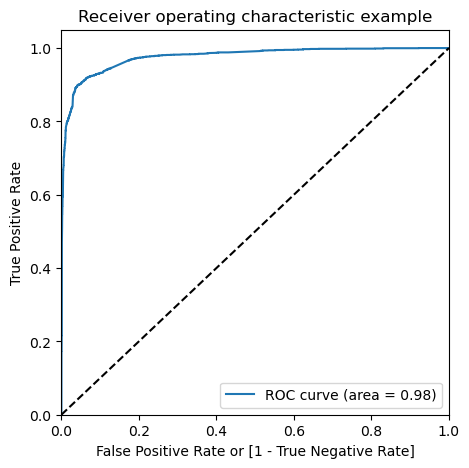

In [102]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [103]:
# created columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.103969,0,1,1,0,0,0,0,0,0,0,0
1,0,0.073254,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007102,0,1,0,0,0,0,0,0,0,0,0
3,1,0.850466,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999037,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.857188  0.975879  0.782843
0.2   0.2  0.905369  0.940720  0.883227
0.3   0.3  0.924736  0.922731  0.925992
0.4   0.4  0.931822  0.905151  0.948528
0.5   0.5  0.935601  0.892478  0.962612
0.6   0.6  0.932137  0.872036  0.969782
0.7   0.7  0.917021  0.819297  0.978233
0.8   0.8  0.911353  0.790679  0.986940
0.9   0.9  0.895450  0.744072  0.990269


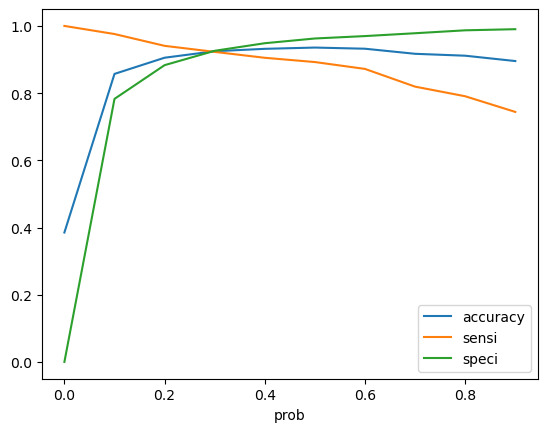

In [105]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [106]:
## from the plot above we can observe, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.103969,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.073254,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.007102,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.850466,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999037,1,1,1,1,1,1,1,1,1,1,1,1


In [107]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.103969,0,1,1,0,0,0,0,0,0,0,0,0,10
1,0,0.073254,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.007102,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.850466,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.999037,1,1,1,1,1,1,1,1,1,1,1,1,100


## Model Evaluation

In [108]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.9247362620059834


In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3616,  289],
       [ 189, 2257]], dtype=int64)

In [110]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [111]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.9227309893704007
Specificity : 0.9259923175416133
False Positive rate :  0.07400768245838668
Positive Predictive Value : 0.8864886095836606
Negative Predictive Value :  0.9503285151116951


In [112]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [113]:
#Precision & Recall
print("Precision : ",(TP/(TP+FP)))
print("Recall : ",(TP/(TP+FN)))

Precision :  0.8864886095836606
Recall :  0.9227309893704007


In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

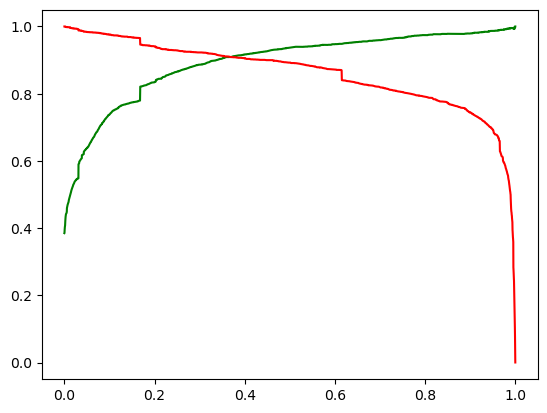

In [115]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [117]:
X_test.shape

(2723, 107)

In [118]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[rfe_columns]
X_test.shape

(2723, 15)

In [119]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.211439
1490    0.991753
7936    0.187388
4216    0.963620
3830    0.069647
1800    0.898333
6507    0.015408
4821    0.005476
4223    0.998736
4714    0.202724
dtype: float64

In [120]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
y_pred_1.isnull().sum()

0    0
dtype: int64

In [122]:
y_pred_1.head()

,0
3271,0.211439
1490,0.991753
7936,0.187388
4216,0.963620
3830,0.069647


In [123]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [124]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.211439
1,1,0.991753
2,0,0.187388
3,1,0.963620
4,0,0.069647


In [127]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [128]:
# Make predictions on the test set using 0.30 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.30 else 0)


In [129]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.211439,0
1,1,0.991753,1
2,0,0.187388,0
3,1,0.963620,1
4,0,0.069647,0


In [130]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.914799853103195

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1598,  136],
       [  96,  893]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Calculate Precision

print("Sensitivity :", TP/(TP+FP))

Sensitivity : 0.8678328474246841


In [134]:
# Calculate Recall

TP/(TP+FN)

0.9029322548028311

In [135]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.9029322548028311
Specificity : 0.9215686274509803
False Positive rate :  0.0784313725490196
Positive Predictive Value : 0.8678328474246841
Negative Predictive Value :  0.9433293978748524


In [136]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,0,0.211439,0,21
1,1,0.991753,1,99
2,0,0.187388,0,19
3,1,0.963620,1,96
4,0,0.069647,0,7


In [137]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Converted,Conversion_Prob,final_predicted,Lead_Score
1,1,0.991753,1,99
3,1,0.963620,1,96
5,1,0.898333,1,90
8,1,0.998736,1,100
10,1,0.997089,1,100
...,...,...,...,...
2700,1,0.995000,1,100
2703,1,0.888475,1,89
2706,1,0.990493,1,99
2715,1,0.975062,1,98


In [138]:
#Finding out the Important Features from our final model:
result.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          8.497577
Tags_Lost to EINS                                8.447518
Tags_Will revert after reading the email         6.713132
Lead Source_Welingak Website                     4.567724
Total Time Spent on Website                      4.127923
Tags_Busy                                        2.415232
Last Activity_SMS Sent                           2.069260
Tags_unknown                                     1.782286
Lead Quality_High in Relevance                   1.274015
Lead Origin_Landing Page Submission             -1.288565
Last Notable Activity_Olark Chat Conversation   -1.611200
Tags_switched off                               -1.768586
Tags_Ringing                                    -1.788626
Last Notable Activity_Modified                  -1.837095
Lead Quality_Worst                              -1.932549
const                                           -3.383807
dtype: float64

## Conclusion of the Analysis

- The company should make calls which are closed by Horizzon CRM Tools first.
- The Company should make calls to the leads coming from "Tags_Will revert after reading the email".
- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
- The company should not make calls to the leads Last Notable Activity is less.
- The company should not make calls to the leads whose lead Quality is worst.